In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy

from collections import defaultdict

In [2]:
def cdf(data, sort_needed=True):
    n = len(data)
    x = data
    if sort_needed:
        x = numpy.sort(data) # sort your data
    y = numpy.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

In [3]:
THEMES = ['darcula', 'dark', 'horizon', 'light', 'material-darker', 'solarized']
# THEMES = ['darcula', 'dark', 'light', 'material-darker', 'solarized']
BASE_DIR = 'serve'

NOTEBOOK_BASE_DIR = 'data-100k/'

def read_html_theme_file_sizes():
    file_sizes_by_themes = defaultdict(list)
    for theme in THEMES:
        file_path_glob_query = f'{BASE_DIR}/{theme}/*.html'
        files = glob.glob(file_path_glob_query)
        for f in files:
            fsize = os.path.getsize(f)
            file_sizes_by_themes[theme].append(fsize)
    
    notebook_glob_query = f'{NOTEBOOK_BASE_DIR}/*.ipynb'
    files = glob.glob(notebook_glob_query)
    for f in files:
        fsize = os.path.getsize(f)
        file_sizes_by_themes['notebook'].append(fsize)
    
    return file_sizes_by_themes

In [4]:
theme_file_sizes = read_html_theme_file_sizes()

In [5]:
for theme, file_sizes in theme_file_sizes.items():
    sorted_file_sizes = sorted(file_sizes)
    print(theme, len(file_sizes), sorted_file_sizes[-1])

darcula 98291 124094225
dark 98291 124089167
horizon 98291 124576678
light 98291 124088071
material-darker 98291 124088314
solarized 98291 124089938
notebook 100000 104350544


darcula
	darcula | 25 | 635430.5 bytes |
	darcula | 50 | 678898.0 bytes |
	darcula | 75 | 851034.0 bytes |
	darcula | 90 | 1448521.0 bytes |
	darcula | 95 | 2393800.0 bytes |
	darcula | 99 | 7775942.000000055 bytes |
	darcula | 100 | 124094225.0 bytes |
dark
	dark | 25 | 630372.5 bytes |
	dark | 50 | 673840.0 bytes |
	dark | 75 | 845976.0 bytes |
	dark | 90 | 1443463.0 bytes |
	dark | 95 | 2388742.0 bytes |
	dark | 99 | 7770884.000000055 bytes |
	dark | 100 | 124089167.0 bytes |
horizon
	horizon | 25 | 1117883.5 bytes |
	horizon | 50 | 1161351.0 bytes |
	horizon | 75 | 1333487.0 bytes |
	horizon | 90 | 1930974.0 bytes |
	horizon | 95 | 2876253.0 bytes |
	horizon | 99 | 8258395.000000055 bytes |
	horizon | 100 | 124576678.0 bytes |
light
	light | 25 | 629263.5 bytes |
	light | 50 | 672725.0 bytes |
	light | 75 | 844880.0 bytes |
	light | 90 | 1442367.0 bytes |
	light | 95 | 2387646.0 bytes |
	light | 99 | 7769788.000000055 bytes |
	light | 100 | 124088071.0 bytes |
material-darker
	mate

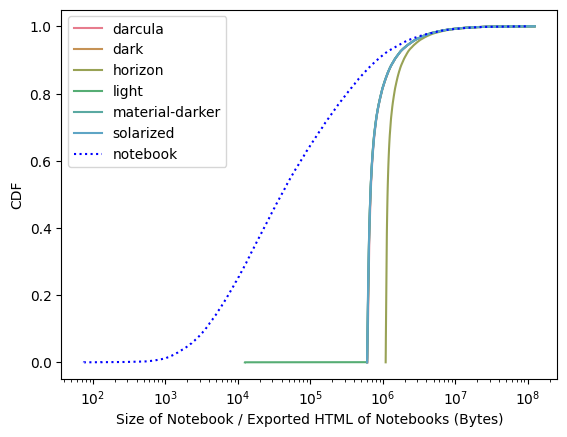

In [6]:
# Visualization
import matplotlib.ticker as ticker

def sizeof_fmt(x, pos):
    if x < 0:
        return ""
    for x_unit in ['B', 'kB', 'MB', 'GB', 'TB']:
        if x < 1024.0:
            return "%3.1f %s" % (x, x_unit)
        x /= 1024.0

theme_style = {
    'darcula': '#e77c8d',
    'dark': '#c69255',
    'horizon': '#98a255',
    'light': '#56ad74',
    'material-darker': '#5aa9a2',
    'solarized': '#5ea5c5',
    'notebook': 'blue'
}

line_style = {
    'darcula': '-',
    'dark': '-',
    'horizon': '-',
    'light': '-',
    'material-darker': '-',
    'solarized': '-',
    'notebook': ':'
}

PLOT_THEMES_ONLY = set([])

fig, ax = plt.subplots(nrows=1, ncols=1)
for theme, file_size_bytes in theme_file_sizes.items():
    if theme in PLOT_THEMES_ONLY:
        continue
    sorted_file_sizes = sorted(file_size_bytes)
    X, Y = cdf(sorted_file_sizes)
    print(f'{theme}')
    for p in [25, 50, 75, 90, 95, 99, 100]:
        print(f'\t{theme} | {p} | {numpy.percentile(X, p)} bytes |')
    
    ax.plot(X, Y, label=f'{theme}', color=theme_style[theme], linestyle=line_style[theme])
ax.set_xlabel('Size of Notebook / Exported HTML of Notebooks (Bytes)')
ax.set_ylabel('CDF')
ax.legend()
ax.set_xscale('log', base=10)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(sizeof_fmt))
plt.savefig('notebook_file_exports.pdf', bbox_inches='tight')
    

In [7]:
# Extract the necessary notebooks and the corresponding HTML and Notebook files into a new directory

A11Y_TEST_DIRECTORY = 'serve/a11y-test'
import pathlib
from collections import defaultdict
pathlib.Path(A11Y_TEST_DIRECTORY).mkdir(parents=True, exist_ok=True) 

notebook_glob_query = f'{NOTEBOOK_BASE_DIR}/*.ipynb'
files = glob.glob(notebook_glob_query)
file_size_to_files_index = defaultdict(set)
for f in files:
    fsize = os.path.getsize(f)
    file_size_to_files_index[fsize].add(f)

filesizes = sorted(list(file_size_to_files_index.keys()))
print(filesizes[:10])

[75, 91, 92, 96, 100, 105, 106, 110, 112, 127]


In [8]:
extractable_items = [
    numpy.percentile(filesizes, 10),
    numpy.percentile(filesizes, 25),
    numpy.percentile(filesizes, 50),
    numpy.percentile(filesizes, 75),
    numpy.percentile(filesizes, 85),
    numpy.percentile(filesizes, 90),
    numpy.percentile(filesizes, 95),
    numpy.percentile(filesizes, 99),
    numpy.percentile(filesizes, 100),
]

print(extractable_items)

[8118.900000000001, 24064.5, 89321.0, 370266.5, 754271.5500000002, 1219381.8999999994, 2609815.6500000004, 10649708.200000001, 104350544.0]


In [15]:
files_to_extract = {}

for required_file_size in extractable_items:
    available_file_sizes = list(filter(lambda f_size: f_size >= required_file_size, filesizes))
    immediate_value = available_file_sizes[0]
    print(required_file_size, file_size_to_files_index[immediate_value], len(available_file_sizes))
    files_to_extract[required_file_size] = file_size_to_files_index[immediate_value]
    
pathlib.Path(f'{A11Y_TEST_DIRECTORY}/notebook').mkdir(parents=True, exist_ok=True) 

commands = []
for filesize, filepath in files_to_extract.items():
    filepath = list(filepath)
    print(f'Filesize: {filesize} Bytes. Chosen immediate file: {filepath[0]}')
    # Copy the required files into the corresponding directories.
    base_file_dir, filename = filepath[0].split('/')
    command = ['cp', f'{filepath[0]}', f'{A11Y_TEST_DIRECTORY}/notebook/{filename}']
    commands.append(command)
    for theme in THEMES:
        pathlib.Path(f'{A11Y_TEST_DIRECTORY}/{theme}').mkdir(parents=True, exist_ok=True)
        filesegment, extension = filename.split('.')
        copied_filename = f'{filesegment}.html'
        command = ['cp', f'{BASE_DIR}/{theme}/{copied_filename}', f'{A11Y_TEST_DIRECTORY}/{theme}/{copied_filename}']
        commands.append(command)

import subprocess
for command in commands:
    subprocess.run(command)

8118.900000000001 {'data-100k/b5a87515a38adea9c2bcef976824d7846cb7bc83.ipynb'} 62856
24064.5 {'data-100k/d15ce6adaa08e8f19bb5654c3cb8f1cce52c5bcc.ipynb'} 52380
89321.0 {'data-100k/b84632edd35ae5b69ddb2bb1110e8e6020888bc0.ipynb'} 34920
370266.5 {'data-100k/00b5c54533988a0f17cd144962ee60f729abac15.ipynb'} 17460
754271.5500000002 {'data-100k/c8088e35674e47675dfdc609c022410261b0ef58.ipynb'} 10476
1219381.8999999994 {'data-100k/46e7ef630571d3ac46470b80697aceb731a771b4.ipynb'} 6984
2609815.6500000004 {'data-100k/efbbee4aad8364ce5de2899d27432340ecadaecd.ipynb'} 3492
10649708.200000001 {'data-100k/953e3d2d39ea3384cad7af412af8179b3d460133.ipynb'} 699
104350544.0 {'data-100k/df1b9ff6c018f9e29e564ad9160a53e279fbe6e0.ipynb'} 1
Filesize: 8118.900000000001 Bytes. Chosen immediate file: data-100k/b5a87515a38adea9c2bcef976824d7846cb7bc83.ipynb
Filesize: 24064.5 Bytes. Chosen immediate file: data-100k/d15ce6adaa08e8f19bb5654c3cb8f1cce52c5bcc.ipynb
Filesize: 89321.0 Bytes. Chosen immediate file: data-10